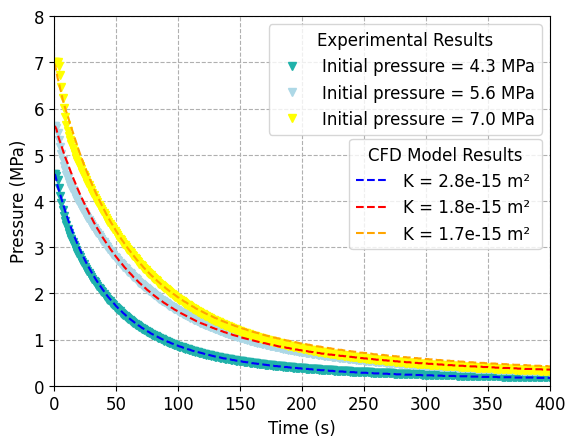

In [42]:


import matplotlib as mpl
import numpy as np #library to import csv data
import matplotlib.pyplot as plt #library for visualization
import pylab
import pandas as pd 

# data = np.genfromtxt('model_pellets.csv', delimiter=',', skip_header = 1)
data1 = pd.read_csv('experimental_data_600.csv')
data2 = pd.read_csv('experimental_data_800.csv')
data3 = pd.read_csv('experimental_data_1000.csv')
data4 = pd.read_csv('model_pellets_no_quadratic_600.csv')
data5 = pd.read_csv('model_pellets_no_quadratic_800.csv')
data6 = pd.read_csv('model_pellets_no_quadratic_1000.csv')
 


# plt.plot(data[0], data[2], 'o', color='g', label = 'theoretical')
line1, = plt.plot(data4['time'], data4['inlet-p']/1e6, 'v', color='lightseagreen', label = 'Initial pressure = 4.3 MPa')
line2, = plt.plot(data5['time'], data5['inlet-p']/1e6, 'v', color='lightblue', label = 'Initial pressure = 5.6 MPa')
line3, = plt.plot(data6['time'], data6['inlet-p']/1e6, 'v', color='yellow', label = 'Initial pressure = 7.0 MPa')
line4, = plt.plot(data1['time'], data1['inlet-p']/1e6, linestyle='--', color='blue', label = 'K = 2.8e-15 m\u00B2')
line5, = plt.plot(data2['time'], data2['inlet-p']/1e6, linestyle='--', color='red', label = 'K = 1.8e-15 m\u00B2')
line6, = plt.plot(data3['time'], data3['inlet-p']/1e6, linestyle='--', color='orange', label = 'K = 1.7e-15 m\u00B2 ')

# Create the first legend for the first set of plots
legend1 = plt.legend(handles=[line1, line2, line3], loc = 'upper right', title = 'Experimental Results', title_fontsize = '12', fontsize = 12)

# Create the second legend for the second set of plots
legend2 = plt.legend(handles=[line4, line5, line6], loc='upper right', bbox_to_anchor=(1, 0.69), title = 'CFD Model Results', title_fontsize = '12', fontsize = 12)

# Add the first legend back to the plot
plt.gca().add_artist(legend1)


plt.grid(which = 'major', axis = 'both', linestyle = '--')
plt.xlabel('Time (s)', fontsize = 12)
plt.xlim(0, 400)
plt.ylim(0, 8)
plt.ylabel('Pressure (MPa)', fontsize = 12) 
plt.tick_params(axis='both', which='major', labelsize=12) 
# plt.legend(fontsize = 12, framealpha = 1.0)




In [32]:
# Function to compute Absolute Root Mean Square Error (ARMSE)
def compute_rmse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    rmse = np.sqrt(mean_squared_error)
    return rmse

# Compute the error between the plot and experimental data
x_values = data1['time']
y_values = data1['inlet-p']
experimental_y_values = np.interp(x_values, data4['time'], data4['inlet-p'])
range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
rmse = compute_rmse(y_values, experimental_y_values)/1e6

print(f"rmse_600 = ", rmse, f"MPa")

# Compute the error between the plot and experimental data
x_values = data2['time']
y_values = data2['inlet-p']
experimental_y_values = np.interp(x_values, data5['time'], data5['inlet-p'])
range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
rmse = compute_rmse(y_values, experimental_y_values)/1e6

print(f"rmse_800 = ", rmse, f"MPa")

# Compute the error between the plot and experimental data
x_values = data3['time']
y_values = data3['inlet-p']
experimental_y_values = np.interp(x_values, data6['time'], data6['inlet-p'])
range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
rmse = compute_rmse(y_values, experimental_y_values)/1e6

print(f"rmse_1000 = ", rmse, f"MPa")

rmse_600 =  0.04934610295180229 MPa
rmse_800 =  0.0661370654282792 MPa
rmse_1000 =  0.10383868950307214 MPa
